In [3]:
#Image classification
#reading training data

import pandas as pd
df_img=pd.read_csv('i:\\image_data\\train_image.csv')
df_img.head()

,Image,Name
0,1.jpg,GH
1,2.jpg,GH
2,3.jpg,GH
3,4.jpg,GH
4,5.jpg,GH


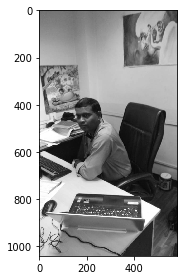

In [5]:
#Preparing X_train
from skimage.io import imread, imshow
from skimage.transform import rescale
import numpy as np

#spepecify the phyical path of your training images
path='I:\\image_data\\training\\'

#specify name of the image file
file=df_img.iloc[0].Image

#file='1.jpg'

#reading first image from training data
image=imread(path+file, as_gray=True)
imshow(image)

In [8]:
#create an empty list
data=[]

for i in range(33):
    
    #spepecify the phyical path of your training images
    path='I:\\image_data\\training\\'

    #specify name of the image file
    file=df_img.iloc[i].Image

    #reading first image from training data
    image=imread(path+file, as_gray=True)
    img_rescale=rescale(image, 0.25)
    image1=np.reshape(img_rescale, img_rescale.shape[0]*img_rescale.shape[1])

    #appending the reshaped data to list named data.
    data.append(image1)


In [9]:
#Preparing X_train
X_train=pd.DataFrame(data)
X_train.to_csv('D:\\training_image.csv')

In [11]:
#Preparing Y
y_train=df_img.Name

In [13]:
#Preparing testing data i.e. X_test

#reading testing file
df_test=pd.read_csv('i:\\image_data\\test_image.csv')
data=[]

for i in range(6):
    
    #spepecify the phyical path of your testing images
    path='I:\\image_data\\test\\'

    #specify name of the image file
    file=df_test.iloc[i].Image

    #reading first image from training data
    image=imread(path+file, as_gray=True)
    img_rescale=rescale(image, 0.25)
    image1=np.reshape(img_rescale, img_rescale.shape[0]*img_rescale.shape[1])

    #appending the reshaped data to list named data.
    data.append(image1)

#preparing X_test

X_test=pd.DataFrame(data)
y_test=df_test.Name

In [14]:
#Applying GaussianNB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

1.0

In [16]:
#prepare confusion matrix of GaussianNB
from sklearn.metrics import confusion_matrix

nb_predict=nb.predict(X_test)
conf_nb=confusion_matrix(y_test, nb_predict)
conf_nb

array([[3, 0],
       [0, 3]], dtype=int64)

In [18]:
#Applying KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8333333333333334

In [19]:
#confusion matrix of KNeighborsClassifier
knn_predict=knn.predict(X_test)
conf_knn=confusion_matrix(y_test, knn_predict)
conf_knn

array([[2, 1],
       [0, 3]], dtype=int64)